```python
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler

model_id = "hakurei/waifu-diffusion"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    revision="fp16",
    scheduler=DDIMScheduler(
        beta_start=0.00085,
        beta_end=0.012,
        beta_schedule="scaled_linear",
        clip_sample=False,
        set_alpha_to_one=False,
    ),
)
pipe = pipe.to(device)

prompt = "touhou hakurei_reimu 1girl solo portrait"
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5)["sample"][0]  
    
image.save("reimu_hakurei.png")
```

/Users/user/Documents/GitHub/stable-diffusion-playground/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 15 files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 8063.90it/s]
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.
/Users/user/Documents/GitHub/stable-diffusion-playground/.venv/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:222: UserWarning: The operator 'aten::repeat_interleave.self_int' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Us

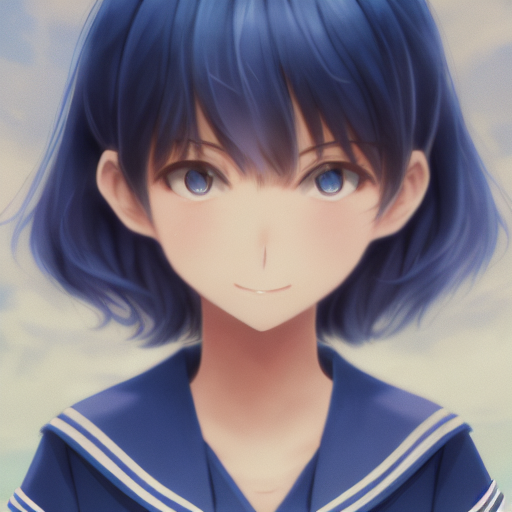

In [1]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler

model_id = "hakurei/waifu-diffusion"
device = "mps"
# generator = torch.Generator(device=device).manaul_seed(123)

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    # torch_dtype=torch.float16,
    revision="fp16",
    scheduler=DDIMScheduler(
        beta_start=0.00085,
        beta_end=0.012,
        beta_schedule="scaled_linear",
        clip_sample=False,
        set_alpha_to_one=False,
    ),
)
pipe = pipe.to(device)
pipe.safety_checker = lambda images, **kwargs: (images, False)

prompt = "extremely detailed CG wallpaper," \
    "dark blue hair," \
    "short hair," \
    "light blue sailor suit," \
    "school student girl," \
    "pretty girl," \
    "slight smile," \
    "kawaii," \
    "soft focus," \
    "beautiful composition"

# First-time "warmup" pass (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(
    prompt,
    guidance_scale=7.5,
    # generator=generator,
)["sample"][0]
image.save("supu.jpg")
image